In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Logistic回归梯度上升优化算法
# 下载文件，数据转化
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('C:\Users\jiao.fang.jiaofang\Desktop\data\Ch05\\testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])]) # 定义X0,X1,X2
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

# sigmoid函数
def sigmoid(intX):
    return 1/(1+ np.exp(-intX))

# 梯度上升
def gradAscent(dataMatIn,classLabels):
    # 转化为Numpy矩阵
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose() # 转化为Numpy以及转置
    m, n = dataMatrix.shape
    alpha = 0.001 # 定义步长
    maxCycless = 500 # 定义迭代次数
    weights = np.ones((n,1)) # 所有回归系数初始化为1
    # 矩阵相乘
    for k in range(maxCycless):
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        # 对应公式：w:= w + alpha*deltaf(w)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights   

In [47]:
mydata,mylabel = loadDataSet()
weights = gradAscent(mydata,mylabel)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [48]:
# 画出数据集和Logistic回归最佳拟合直线的函数
def plotBestFit(wei):
    # 将matrix格式转化为array格式，这块需注意
    weights = np.array(wei)
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = dataArr.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    # 根据labels将数据区分开
    for i in range(n):
        if labelMat[i] == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2]) 
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    # 画出散点图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x = np.arange(-3.0,3.0,0.1)
    # 拟合曲线为0 = w0*x0+w1*x1+w2*x2, 故x2 = (-w0*x0-w1*x1)/w2, x0为1,x1为x, x2为y,故有
    y = (-weights[0] - weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

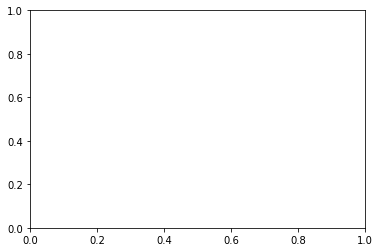

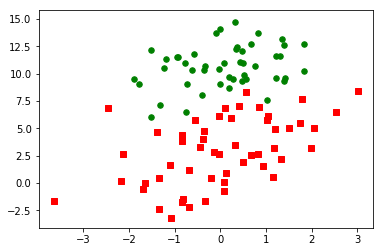

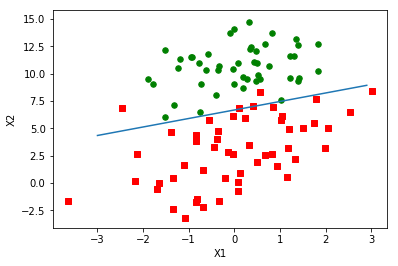

In [37]:
plotBestFit(weights)

In [38]:
# 随机梯度上升算法,一次仅用一个样本点来更新回归系数
def stocGradAscent0(dataMatrix,classLabels):
    m,n = dataMatrix.shape
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

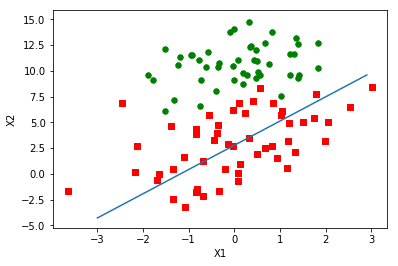

In [39]:
weights = stocGradAscent0(np.array(mydata),mylabel)
plotBestFit(weights)

In [59]:
# 改进随机梯度上升算法，
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n = dataMatrix.shape
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            # aipha不断减小，但不为0
            alpha = 4/(1.0 + i + j) + 0.01
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

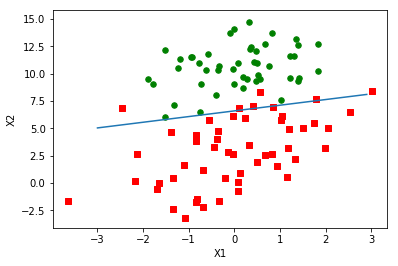

In [60]:
weights = stocGradAscent1(np.array(mydata),mylabel)
plotBestFit(weights)

In [64]:
# 预测病马的死亡率
#分类函数，通过sigmoid计算，一旦大于0.5就阶跃到1，反之被分类为0  
def classifyVector(inX,weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

def colicTest():
    frTrain = open('C:\Users\jiao.fang.jiaofang\Desktop\data\Ch05\horseColicTraining.txt')
    frTest = open('C:\Users\jiao.fang.jiaofang\Desktop\data\Ch05\horseColicTest.txt')
    # 进行数据的转化，转化为回归能够识别的数据
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    # 计算随机梯度上升参数
    trainWeights = stocGradAscent1(np.array(trainingSet),trainingLabels,500)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr),trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = float(errorCount/numTestVec)
    print "the error rate of this test is: %d" % errorRate
    return errorRate

#多次试验求平均值  
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iteration the average error rate is: %f" % (numTests,errorSum/float(numTests))
    